In [17]:
import pandas as pd

# Loading the CSV file into a DataFrame
state = pd.read_csv('./state.csv')

In [18]:
# Display the first few rows
state.head()

,state,year,unemprate,health_exp,income,pop,legislation_year
0,Alabama,2000,4.6,3932.0,24338,4452173,0
1,Alabama,2001,5.1,4168.0,25104,4467634,0
2,Alabama,2002,5.9,4511.0,25712,4480089,0
3,Alabama,2003,6.0,4994.0,26693,4503491,0
4,Alabama,2004,5.7,5252.0,28415,4530729,0


In [19]:
# Descriptive statistics for 'income', 'pop', 'health_exp'
print("Descriptive Statistics for 'income':")
print(state['income'].describe())

print("\nDescriptive Statistics for 'pop':")
print(state['pop'].describe())

print("\nDescriptive Statistics for 'health_exp':")
print(state['health_exp'].describe())

Descriptive Statistics for 'income':
count      816.000000
mean     38340.616422
std       8691.436370
min      21640.000000
25%      32159.250000
50%      37117.500000
75%      43252.750000
max      75457.000000
Name: income, dtype: float64

Descriptive Statistics for 'pop':
count    8.160000e+02
mean     5.924434e+06
std      6.629947e+06
min      4.943000e+05
25%      1.592969e+06
50%      4.148199e+06
75%      6.660362e+06
max      3.899394e+07
Name: pop, dtype: float64

Descriptive Statistics for 'health_exp':
count      765.000000
mean      6374.501961
std       1591.084847
min       3031.000000
25%       5149.000000
50%       6292.000000
75%       7406.000000
max      11944.000000
Name: health_exp, dtype: float64


In [20]:
# Generate 'index'
state['index'] = state.groupby('state')['legislation_year'].cumsum()

print(state[['state', 'year', 'legislation_year', 'index']])

       state  year  legislation_year  index
0    Alabama  2000                 0      0
1    Alabama  2001                 0      0
2    Alabama  2002                 0      0
3    Alabama  2003                 0      0
4    Alabama  2004                 0      0
..       ...   ...               ...    ...
811  Wyoming  2011                 0      0
812  Wyoming  2012                 0      0
813  Wyoming  2013                 0      0
814  Wyoming  2014                 0      0
815  Wyoming  2015                 0      0

[816 rows x 4 columns]


In [21]:
# The 'post' variable is 0 before the first legislation change and 1 after
state['post'] = (state['index'] > 0).astype(int)

print(state[['state', 'year', 'legislation_year', 'index', 'post']])

       state  year  legislation_year  index  post
0    Alabama  2000                 0      0     0
1    Alabama  2001                 0      0     0
2    Alabama  2002                 0      0     0
3    Alabama  2003                 0      0     0
4    Alabama  2004                 0      0     0
..       ...   ...               ...    ...   ...
811  Wyoming  2011                 0      0     0
812  Wyoming  2012                 0      0     0
813  Wyoming  2013                 0      0     0
814  Wyoming  2014                 0      0     0
815  Wyoming  2015                 0      0     0

[816 rows x 5 columns]


In [22]:
# The 'treatment' variable changes based on whether any 'post' change occurs
# The max of 'post' in a state group is 1
state['treatment'] = state.groupby('state')['post'].transform('max')

print(state[['state', 'year', 'legislation_year', 'index', 'post', 'treatment']])

       state  year  legislation_year  index  post  treatment
0    Alabama  2000                 0      0     0          0
1    Alabama  2001                 0      0     0          0
2    Alabama  2002                 0      0     0          0
3    Alabama  2003                 0      0     0          0
4    Alabama  2004                 0      0     0          0
..       ...   ...               ...    ...   ...        ...
811  Wyoming  2011                 0      0     0          0
812  Wyoming  2012                 0      0     0          0
813  Wyoming  2013                 0      0     0          0
814  Wyoming  2014                 0      0     0          0
815  Wyoming  2015                 0      0     0          0

[816 rows x 6 columns]


In [23]:
import pandas as pd

# Loading the Excel file into a DataFrame
consumer_credit = pd.read_excel('./consumer_credit.xlsx')

print(consumer_credit.head())

   consumer_id    state  year      income_w2    total_loan  credit_score  \
0        31621  Alabama  2004   41176.217672  31613.421767           784   
1         1339  Alabama  2004   50691.125526  33264.912553           644   
2        76632  Alabama  2004  141635.415707  42209.341571           674   
3       444128  Alabama  2004   75875.419571  34768.341957           847   
4       422426  Alabama  2005   66274.386758  35062.238676           597   

   payday_loan  
0            0  
1            0  
2            0  
3            0  
4          200  


In [24]:
# Calculate summary statistics
summary_stats = consumer_credit[['credit_score', 'income_w2', 'payday_loan', 'total_loan']].describe()

# describe() returns a DataFrame with statistics. I filter it to include only 'mean', 'median', and 'std'
summary_stats = summary_stats.loc[['mean', '50%', 'std']]  # '50%' is the median in describe()

# Rename the '50%' index to 'median'
summary_stats.rename(index={'50%': 'median'}, inplace=True)

print(summary_stats)

        credit_score     income_w2  payday_loan    total_loan
mean      640.930801  66110.898680   132.786296  34415.417654
median    640.000000  61855.622190   200.000000  33915.473788
std       100.668239  43525.368192   162.277270   4263.061894


In [25]:
import numpy as np

# log of total traditional loan amount
consumer_credit['log_total_loan'] = consumer_credit['total_loan'].apply(lambda x: np.log(x) if x > 0 else 0)

# log of payday loan amount
consumer_credit['log_payday_loan'] = consumer_credit['payday_loan'].apply(lambda x: np.log(x) if x > 0 else 0)

print(consumer_credit[['total_loan', 'log_total_loan', 'payday_loan', 'log_payday_loan']].head())

     total_loan  log_total_loan  payday_loan  log_payday_loan
0  31613.421767       10.361337            0         0.000000
1  33264.912553       10.412258            0         0.000000
2  42209.341571       10.650397            0         0.000000
3  34768.341957       10.456463            0         0.000000
4  35062.238676       10.464880          200         5.298317


In [26]:
# Create income quintiles
consumer_credit['income_quintile'] = consumer_credit.groupby('year')['income_w2'].transform(
    lambda x: pd.qcut(x, 5, labels=False) + 1)

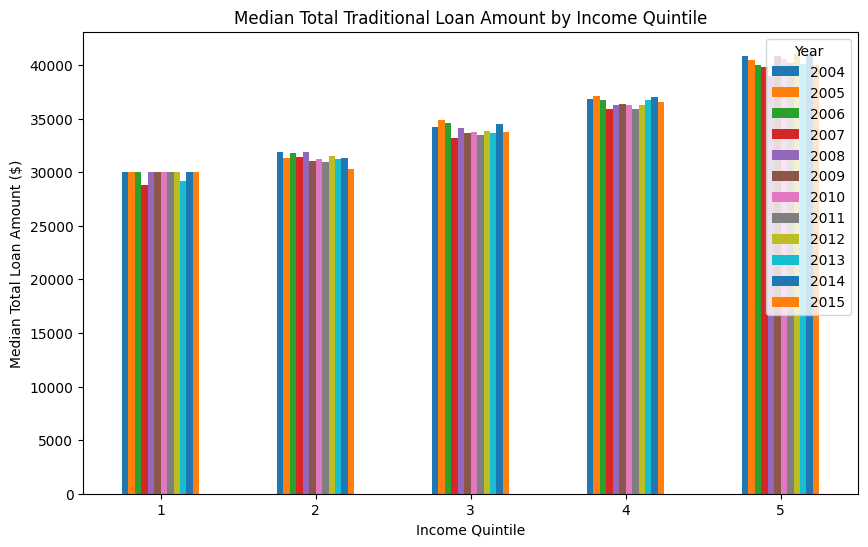

In [27]:
import matplotlib.pyplot as plt

# Median total loan amount for each quintile
median_loans = consumer_credit.groupby(['year', 'income_quintile'])['total_loan'].median().reset_index()

# Pivot the data (years as columns)
pivot_table = median_loans.pivot(index='income_quintile', columns='year', values='total_loan')

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Median Total Traditional Loan Amount by Income Quintile')
plt.xlabel('Income Quintile')
plt.ylabel('Median Total Loan Amount ($)')
plt.xticks(rotation=0)  # quintile labels horizontal
plt.legend(title='Year')
plt.show()


In [28]:
# Merge the DataFrames
merged_df = pd.merge(consumer_credit, state, on=['state', 'year'], how='inner')

print(merged_df.head())

   consumer_id    state  year      income_w2    total_loan  credit_score  \
0        31621  Alabama  2004   41176.217672  31613.421767           784   
1         1339  Alabama  2004   50691.125526  33264.912553           644   
2        76632  Alabama  2004  141635.415707  42209.341571           674   
3       444128  Alabama  2004   75875.419571  34768.341957           847   
4       422426  Alabama  2005   66274.386758  35062.238676           597   

   payday_loan  log_total_loan  log_payday_loan  income_quintile  unemprate  \
0            0       10.361337         0.000000                2        5.7   
1            0       10.412258         0.000000                2        5.7   
2            0       10.650397         0.000000                5        5.7   
3            0       10.456463         0.000000                4        5.7   
4          200       10.464880         5.298317                3        4.5   

   health_exp  income      pop  legislation_year  index  post  treat

In [29]:
import statsmodels.api as sm

# Independent variables
X = sm.add_constant(merged_df[['index', 'income_w2']])  # include W2 income as a control variable

# Dependent variables
y_credit_score = merged_df['credit_score']
y_log_total_loan = merged_df['log_total_loan']
y_log_payday_loan = merged_df['log_payday_loan']

# Create OLS regression models
model_credit_score = sm.OLS(y_credit_score, X).fit()
model_log_total_loan = sm.OLS(y_log_total_loan, X).fit()
model_log_payday_loan = sm.OLS(y_log_payday_loan, X).fit()

print("Regression Results for Credit Score:")
print(model_credit_score.summary())
print("\nRegression Results for Log of Total Traditional Loan Amount:")
print(model_log_total_loan.summary())
print("\nRegression Results for Log of Payday Loan Amount:")
print(model_log_payday_loan.summary())


Regression Results for Credit Score:
                            OLS Regression Results                            
Dep. Variable:           credit_score   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     37.04
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.29e-16
Time:                        04:06:54   Log-Likelihood:                -17742.
No. Observations:                2948   AIC:                         3.549e+04
Df Residuals:                    2945   BIC:                         3.551e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        64

In [30]:
from statsmodels.sandbox.regression.gmm import IV2SLS

# Stage 1
X1 = sm.add_constant(merged_df[['index', 'income_w2']])
y1 = merged_df['log_total_loan']
first_stage = sm.OLS(y1, X1).fit()
merged_df['fitted_log_total_loan'] = first_stage.fittedvalues

# Stage 2
X2 = sm.add_constant(merged_df[['fitted_log_total_loan', 'income_w2']])
y2 = merged_df['log_payday_loan']
second_stage = IV2SLS(y2, X2, instrument=X1).fit()

print(second_stage.summary())


                          IV2SLS Regression Results                           
Dep. Variable:        log_payday_loan   R-squared:                       0.009
Model:                         IV2SLS   Adj. R-squared:                  0.008
Method:                     Two Stage   F-statistic:                     12.88
                        Least Squares   Prob (F-statistic):           2.69e-06
Date:                Tue, 07 May 2024                                         
Time:                        04:06:54                                         
No. Observations:                2948                                         
Df Residuals:                    2945                                         
Df Model:                           2                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    88.29

In [31]:
# Creating the interaction term for DID
merged_df['treatment_post'] = merged_df['treatment'] * merged_df['post']

# Model variables
X_did = sm.add_constant(merged_df[['treatment', 'post', 'treatment_post', 'income_w2']])
y_did = merged_df['log_payday_loan']

# Create the DID regression model
model_did = sm.OLS(y_did, X_did).fit()

print(model_did.summary())

                            OLS Regression Results                            
Dep. Variable:        log_payday_loan   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.641
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.04e-05
Time:                        04:06:54   Log-Likelihood:                -6957.2
No. Observations:                2948   AIC:                         1.392e+04
Df Residuals:                    2944   BIC:                         1.395e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.4427      0.096     35.

The DID regression shows a positive and significant interaction term for 'treatment_post', indicating that stricter debt collection laws lead to an increase in payday loan usage. This finding suggests that when it's harder to get or manage traditional loans, people might turn to payday loans, which generally don't involve third-party debt collectors. This shift demonstrates how changes in laws affecting credit card companies and other traditional lenders can influence consumer behavior, driving them toward alternative financial options. Both the DID and 2SLS analyses consistently show that tougher regulations on traditional loans are associated with more payday loan usage.

In [32]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # In the future,  empty or all-NA columns will no longer be automatically excluded by pandas. I suppressed this because I'm sure about the integrity of my data.

results = pd.DataFrame(columns=['Quintile', 'Coefficient', 'Std Err', 't', 'P>|t|'])

for quintile in range(1, 6):
    # Filter the data and use a copy to avoid SettingWithCopyWarning in VSCode
    data_quintile = merged_df[merged_df['income_quintile'] == quintile].copy()
    data_quintile['treatment_post'] = data_quintile['treatment'] * data_quintile['post']
    
    # Model variables
    X_did = sm.add_constant(data_quintile[['treatment', 'post', 'treatment_post', 'income_w2']])
    y_did = data_quintile['log_payday_loan']
    
    model_did = sm.OLS(y_did, X_did).fit()
    
    # Results for the interaction term
    interaction_details = {
        'Coefficient': model_did.params['treatment_post'],
        'Std Err': model_did.bse['treatment_post'],
        't': model_did.tvalues['treatment_post'],
        'P>|t|': model_did.pvalues['treatment_post']
    }
    
    # Add the results for this quintile to the DataFrame
    results_row = pd.DataFrame({
        'Quintile': [quintile],
        'Coefficient': [interaction_details['Coefficient']],
        'Std Err': [interaction_details['Std Err']],
        't': [interaction_details['t']],
        'P>|t|': [interaction_details['P>|t|']]
    })

    # Use 'concat()' to add rows
    results = pd.concat([results, results_row], ignore_index=True)

print(results)


  Quintile  Coefficient   Std Err         t     P>|t|
0        1     0.245577  0.193766  1.267389  0.205516
1        2     0.131969  0.185596  0.711056  0.477334
2        3     0.380517  0.199573  1.906660  0.057056
3        4     0.283619  0.202427  1.401091  0.161718
4        5     0.008805  0.206442  0.042649  0.965996


**Paragraph 1:**
The variable 'index' is a good instrument for Task 10 because it marks the period before and after legislative changes, providing a clear, quantitative measure of regulations over time. Because it tracks granularly, in Task 10 - when we assess how changes in the regulation of debt collection impact consumer decisions regarding payday loans - it allows us to isolate the effects of the legislation from other variables. Then, we can determine the true impact of regulatory changes.

**Paragraph 2:**
The results from the DID and 2SLS analyses show that while stricter debt collection laws are intended to benefit consumers, they resulted in an increase in payday loans. This protects consumers from one form of financial stress (aggressive debt collection), but it pushes them towards other risky financial behaviors like payday loans (which have high interest rates and can contribute to more debt). Thus, although the regulations are meant to protect consumers, they may result in negative consequences.